In [27]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,classification_report
import tensorflow as tf
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

In [3]:
#loading data
data = pd.read_csv('breast_cancer.csv')
data.head()

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0  ...          17.33           184.60      2019.0            0.1622   
1  ...          23.41           158.80      1956.0            0.1238   
2  ...          25.53           152.50      1709.0            0.1444   
3  ...          26.50            98.87       567.7            0.2098   
4  ...          16.67           152.20      1575.0            0.1374   

   compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0             0.6656           0.7119                0.2654          0.4601   
1             0.1866           0.2416                0.1860          0.2750   
2             0.4245           0.4504                0.2430          0.3613   
3             0.8663           0.6869                0.2575          0.6638   
4             0.2050           0.4000                0.1625          0.2364   

   fractal_dimension_worst  Unnamed: 32  
0                  0.11890          NaN  
1                  0.08902          NaN  
2                  0.08758          NaN  
3                  0.17300          NaN  
4                  0.07678          NaN  

[5 rows x 33 columns]

In [4]:
#removing extra column
data = data.loc[:, ~data.columns.str.contains('^Unnamed')] #remove unnamed last column
data.head()

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  radius_worst  texture_worst  perimeter_worst  area_worst  \
0  ...         25.38          17.33           184.60      2019.0   
1  ...         24.99          23.41           158.80      1956.0   
2  ...         23.57          25.53           152.50      1709.0   
3  ...         14.91          26.50            98.87       567.7   
4  ...         22.54          16.67           152.20      1575.0   

   smoothness_worst  compactness_worst  concavity_worst  concave points_worst  \
0            0.1622             0.6656           0.7119                0.2654   
1            0.1238             0.1866           0.2416                0.1860   
2            0.1444             0.4245           0.4504                0.2430   
3            0.2098             0.8663           0.6869                0.2575   
4            0.1374             0.2050           0.4000                0.1625   

   symmetry_worst  fractal_dimension_worst  
0          0.4601                  0.11890  
1          0.2750                  0.08902  
2          0.3613                  0.08758  
3          0.6638                  0.17300  
4          0.2364                  0.07678  

[5 rows x 32 columns]

In [5]:
data = data.drop('id',axis =1)
data.head()#drop id as it does not contibute to the analysis

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0         M        17.99         10.38          122.80     1001.0   
1         M        20.57         17.77          132.90     1326.0   
2         M        19.69         21.25          130.00     1203.0   
3         M        11.42         20.38           77.58      386.1   
4         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0         0.2419  ...         25.38          17.33           184.60   
1         0.1812  ...         24.99          23.41           158.80   
2         0.2069  ...         23.57          25.53           152.50   
3         0.2597  ...         14.91          26.50            98.87   
4         0.1809  ...         22.54          16.67           152.20   

   area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0      2019.0            0.1622             0.6656           0.7119   
1      1956.0            0.1238             0.1866           0.2416   
2      1709.0            0.1444             0.4245           0.4504   
3       567.7            0.2098             0.8663           0.6869   
4      1575.0            0.1374             0.2050           0.4000   

   concave points_worst  symmetry_worst  fractal_dimension_worst  
0                0.2654          0.4601                  0.11890  
1                0.1860          0.2750                  0.08902  
2                0.2430          0.3613                  0.08758  
3                0.2575          0.6638                  0.17300  
4                0.1625          0.2364                  0.07678  

[5 rows x 31 columns]

In [6]:
#encode the values of Diagnosis D and M int o 0 and 1
label_encoder = preprocessing.LabelEncoder() 
data['diagnosis'] = label_encoder.fit_transform(data['diagnosis'])
data['diagnosis'].unique()
data.head()

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0          1        17.99         10.38          122.80     1001.0   
1          1        20.57         17.77          132.90     1326.0   
2          1        19.69         21.25          130.00     1203.0   
3          1        11.42         20.38           77.58      386.1   
4          1        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0         0.2419  ...         25.38          17.33           184.60   
1         0.1812  ...         24.99          23.41           158.80   
2         0.2069  ...         23.57          25.53           152.50   
3         0.2597  ...         14.91          26.50            98.87   
4         0.1809  ...         22.54          16.67           152.20   

   area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0      2019.0            0.1622             0.6656           0.7119   
1      1956.0            0.1238             0.1866           0.2416   
2      1709.0            0.1444             0.4245           0.4504   
3       567.7            0.2098             0.8663           0.6869   
4      1575.0            0.1374             0.2050           0.4000   

   concave points_worst  symmetry_worst  fractal_dimension_worst  
0                0.2654          0.4601                  0.11890  
1                0.1860          0.2750                  0.08902  
2                0.2430          0.3613                  0.08758  
3                0.2575          0.6638                  0.17300  
4                0.1625          0.2364                  0.07678  

[5 rows x 31 columns]

In [7]:
#seperate X and y
X = data.iloc[:,1:31]
y= data.iloc[:,0:1]
#y
#X

In [8]:
#split the data 
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.30,random_state =42)

In [9]:
#X_train

In [10]:
#scaling the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train

array([[-0.12348985, -0.29680142, -0.17050713, ..., -0.84082156,
        -0.8563616 , -0.76574773],
       [-0.22826757, -0.65795149, -0.25377521, ..., -0.37706655,
        -1.3415819 , -0.41480748],
       [ 0.14553402, -1.23056444,  0.24583328, ..., -0.04762652,
        -0.08997059,  0.4882635 ],
       ...,
       [ 0.03226081, -0.55578404, -0.08064356, ..., -1.26179013,
        -0.6828391 , -1.27672587],
       [-0.05552593,  0.10949242, -0.04684166, ...,  1.07924018,
         0.4755842 ,  1.25530227],
       [-0.56525537,  0.32333128, -0.619825  , ..., -0.61952313,
        -0.30366032, -0.84348042]])

SVM

In [11]:
#training the SVM  model
svm_model = SVC(kernel = 'linear')
svm_model.fit(X_train,y_train.values.ravel())
y_pred = svm_model.predict(X_test)
y_pred
accuracy = accuracy_score(y_test,y_pred)
precision = precision_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)
#f1_score = f1_score(y_test,y_pred)
print(f"Accuracy of  SVM model:", accuracy)
print(f"Precision oM SVm model:",precision)
print(f"Recall of SVM model:",recall)

Accuracy of  SVM model: 0.9766081871345029
Precision oM SVm model: 0.9682539682539683
Recall of SVM model: 0.9682539682539683


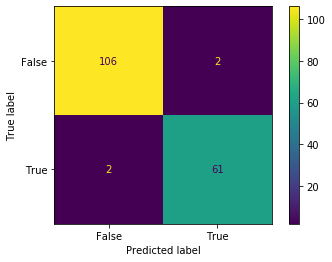

In [12]:
#plotting confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()


LOGISTIC REGRESSION

In [13]:
import warnings
warnings.filterwarnings("ignore")


In [14]:
X_train = np.column_stack((np.ones(X_train.shape[0]), X_train))
X_test = np.column_stack((np.ones(X_test.shape[0]), X_test))

y_train = y_train.values.ravel()
y_test = y_test.values.ravel()


In [15]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (398, 31)
X_test shape: (171, 31)
y_train shape: (398,)
y_test shape: (171,)


In [16]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [17]:
def gradient_descent(X, y, theta, alpha, num_iterations):
    m = len(y)
    J_history = []

    for _ in range(num_iterations):
        h = sigmoid(X @ theta)
        gradient = X.T @ (h - y) / m
        theta = theta - alpha * gradient
        J_history.append(cost_function(X, y, theta))

    return theta, J_history


In [18]:
def cost_function(X, y, theta):
    m = len(y)
    h = sigmoid(X @ theta)
    J = -1/m * (y @ np.log(h) + (1 - y) @ np.log(1 - h))
    return J


Accuracy of Logistic model: 0.9766081871345029
Precision of Logistic model: 0.9538461538461539
Recall of Logistic model: 0.9841269841269841


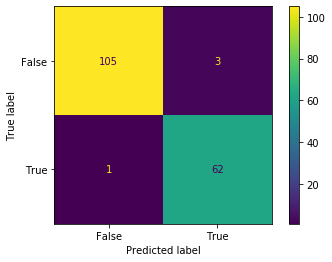

In [19]:
alpha = 0.01
num_iterations = 1500
theta = np.random.rand(X_train.shape[1])
# Run gradient descent
theta, J_history = gradient_descent(X_train, y_train, theta, alpha, num_iterations)
y_pred = (sigmoid(X_test @ theta) >= 0.5).astype(int)
accuracy = accuracy_score(y_test,y_pred)
precision = precision_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)
#f1_score = f1_score(y_test,y_pred)
print(f"Accuracy of Logistic model:", accuracy)
print(f"Precision of Logistic model:",precision)
print(f"Recall of Logistic model:",recall)

confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()


Neural Network

In [20]:
import tensorflow as tf 
tf.random.set_seed(3)
from tensorflow import keras


In [21]:
model = keras.Sequential([
                          keras.layers.Flatten(input_shape=(31,)),
                          keras.layers.Dense(20, activation='relu'),
                          keras.layers.Dense(2, activation='sigmoid')
])


In [22]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [23]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)
#X_train

X_train shape: (398, 31)
X_test shape: (171, 31)
y_train shape: (398,)
y_test shape: (171,)


In [24]:
history = model.fit(X_train, y_train, validation_split=0.2, epochs=10)

Epoch 1/10
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
 1/10 [==>...........................] - ETA: 3s - loss: 0.9381 - accuracy: 0.7188WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x7f6aec0cd170> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and 

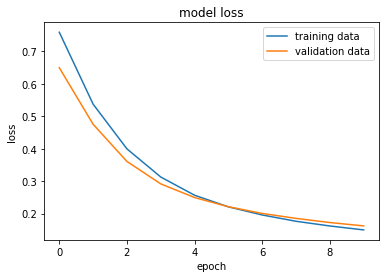

In [25]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')

plt.legend(['training data', 'validation data'], loc = 'upper right')

In [29]:

loss, accuracy = model.evaluate(X_test, y_test)
print(accuracy)
# Predict classes for the test set
y_pred = model.predict(X_test)




6/6 [==============================] - 0s 4ms/step - loss: 0.1364 - accuracy: 0.9591
0.9590643048286438
6/6 [==============================] - 0s 1ms/step
